## Imports

In [1]:
import numpy as np
import pandas as pd
import time

# Visualize
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Sklearn
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Read Data

In [2]:
data = pd.read_csv('Data/prepared_data.csv')
df = data.copy()
y = data['BALANCE']
data.drop('BALANCE', inplace=True, axis=1)

In [3]:
data.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## PCA

#### Dataframe and Visuzlize

In [4]:
feat_cols = [ i for i in data]

In [5]:
pca_df = pd.DataFrame(data, columns=feat_cols)

In [6]:
pca_df.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
class PCA_Scratch():

    def __init__(self,n_components):
        self.n_components = n_components
        self.components   = None
        self.mean         = None
        self.variance     = None
        
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X): 
        # Step 1: Normalization using mean and Variance
        self.mean = np.mean(X)
        self.variance = np.var(X)
        
        X -= self.mean
        X /= self.variance
        
        # Step 2: Covariance
        cov_matrix = np.cov(np.transpose(X))
        
        # Step 3: Eigen vector and Eigen values
        values, vectors = np.linalg.eig(cov_matrix)
        vectors = np.transpose(vectors)

        # Step 4: Sort values 
        indexes = np.argsort(values)[::-1]
        values  = values[indexes]
        vectors = vectors[indexes]
        
        # Store eigne vectors first n 
        self.components = vectors[0: self.n_components]
        
    def transform(self,Z):
        # Projections
        Z_new = (Z - self.mean )/ self.variance
        Z_new = np.dot(Z_new, self.components.T)

        return Z_new

    #optional 
    def plot_explained_variance(self, transformed):
        pass        

Text(0, 0.5, 'cumulative explained variance')

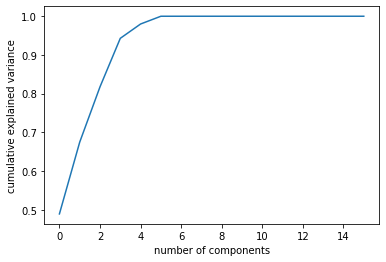

In [8]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Choosing 4 Components

In [9]:
pca_section = PCA_Scratch(4)
pca_section.fit(data)
data_transformed = pca_section.transform(data)
# pca_section.explained_variance #return list len = 4

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
pca_section.components 

array([[ 2.20974751e-01, -1.90280924e-05, -1.76816022e-05,
        -4.66773984e-05,  5.20959269e-05, -2.24651206e-01,
        -1.47721477e-01, -1.93509693e-01,  8.67949354e-01,
         1.98776811e-02, -1.91225787e-03,  3.39218819e-06,
         6.09718142e-06,  1.00120176e-05, -2.95787075e-01,
        -1.44740951e-02],
       [ 7.91049113e-01,  3.81397259e-05,  4.04677546e-05,
         7.65599460e-05,  3.68492871e-07,  3.44968095e-01,
         4.16514928e-01,  2.63239740e-01,  5.08519368e-02,
         1.63626974e-03,  4.30036210e-03,  1.21104494e-05,
         1.29006877e-05,  8.29011975e-06,  9.70094779e-02,
         2.09888051e-02],
       [-4.05835509e-01,  2.98577707e-05,  3.55704705e-05,
         4.68288293e-05,  2.83798394e-05,  1.86464222e-01,
         3.33290977e-01,  1.10059373e-01,  4.63597220e-01,
         1.26867107e-02,  2.66438429e-03,  1.59900095e-05,
         2.73919584e-05, -1.20828286e-05,  6.79307772e-01,
        -2.79857853e-02],
       [ 2.91118559e-01, -3.62382663e

In [11]:
print(f"Dimentionality Reduction from {data.shape[1]} dimentions \
to {data_transformed.shape[1]} dimentions")

Dimentionality Reduction from 16 dimentions to 4 dimentions


In [12]:
pca_df['y'] = y
pca_df['label'] = pca_df['y'].apply(lambda i: str(i))

In [13]:
pca_df['pca-one'] = data_transformed[:,0]
pca_df['pca-two'] = data_transformed[:,1] 
pca_df['pca-three'] = data_transformed[:,2]
pca_df['pca-four'] = data_transformed[:,3]

In [14]:
pca_df.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,y,label,pca-one,pca-two,pca-three,pca-four
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,...,201.802084,139.509787,0.000000,12,40.900749,40.900749,-66.620582,-54.532426,-55.657249,-3.335397
1,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,...,4103.032597,1072.340217,0.222222,12,3202.467416,3202.467416,68.184685,-23.917819,23.967188,21.884382
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,...,622.066742,627.284787,0.000000,12,2495.148862,2495.148862,-79.082814,53.929478,-31.385321,-86.002235
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,...,0.000000,312.343947,0.000000,12,1666.670542,1666.670542,-34.459082,-95.166248,-5.593285,-28.390747
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,...,678.334763,244.791237,0.000000,12,817.714335,817.714335,-54.048845,-6.465419,-76.548119,4.783819


In [15]:
np.random.seed(42)
rndperm = np.random.permutation(pca_df.shape[0])

### 2D-PCA Plot

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

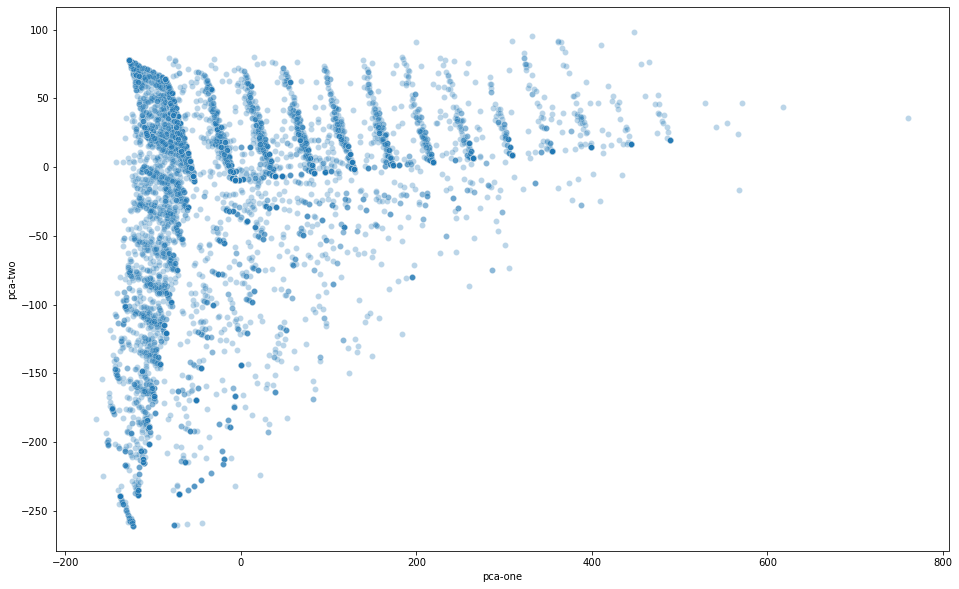

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    data=pca_df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

### 3D-PCA Plot

/var/folders/pt/jyznl8l11dnchkwt6_m3kqy80000gn/T/ipykernel_20359/600946344.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


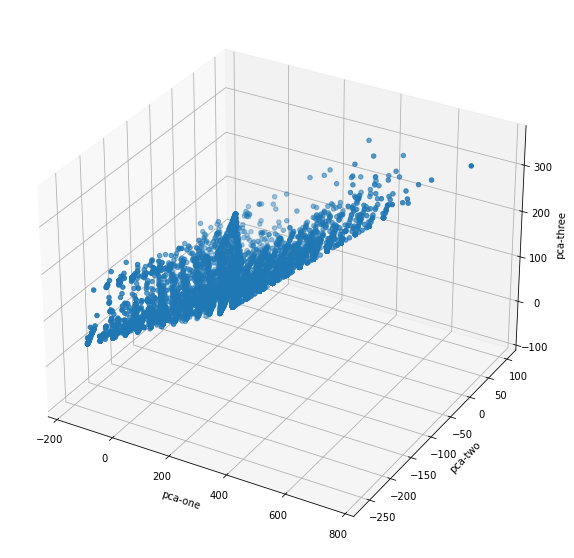

In [17]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[rndperm,:]["pca-one"], 
    ys=pca_df.loc[rndperm,:]["pca-two"], 
    zs=pca_df.loc[rndperm,:]["pca-three"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## T-SNE

In [18]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=1000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(data)
tsne_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.000s...
[t-SNE] Computed neighbors for 8950 samples in 1.960s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.000535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.233124
[t-SNE] KL divergence after 1000 iterations: 0.573882


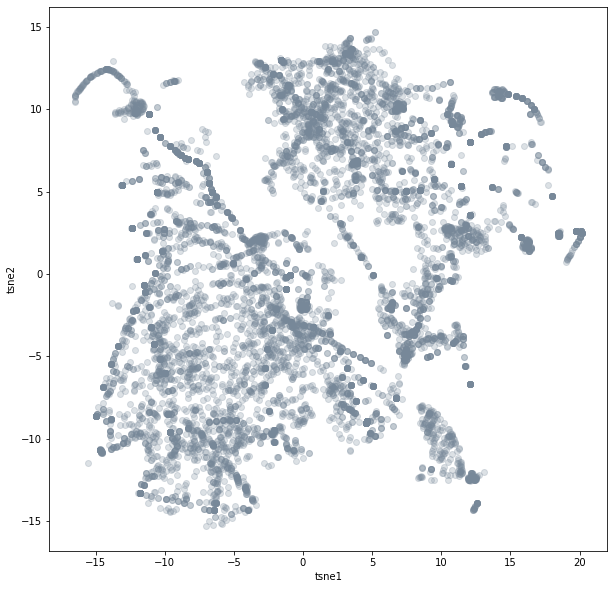

In [19]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_scale.iloc[:,0],tsne_scale.iloc[:,1],alpha=0.25,\
            facecolor='lightslategray')

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

## Kernel PCA

In [20]:
transformer = KernelPCA(n_components=4, kernel='linear')

In [21]:
data_k_transformed = transformer.fit_transform(data)

In [22]:
data_k_transformed.shape

(8950, 4)

In [23]:
data_k_transformed

array([[-1.50378386,  3.28265809, -3.69515305, -0.19319243],
       [ 3.84079231,  1.92738796,  0.05640126, -2.01235584],
       [-3.50787268, -5.60638972, -0.35834245,  7.85095998],
       ...,
       [-3.90449011,  0.45595241, -0.54754969, -2.41961245],
       [ 1.68783962,  3.14001199, -0.04668905, -1.79313457],
       [ 3.47198233,  1.0132041 ,  4.37148063,  6.51529719]])

In [24]:
pd.DataFrame(data_k_transformed).head()

,0,1,2,3
0,-1.503784,3.282658,-3.695153,-0.193192
1,3.840792,1.927388,0.056401,-2.012356
2,-3.507873,-5.606390,-0.358342,7.850960
3,-0.333082,5.667113,-1.257676,1.543631
4,-0.707836,0.647027,-4.852496,-0.325122
